> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** %s
* **Matrícula:**  %d

# Aula Prática 10
## Aprendizado de Máquina Não-Supervisionado - Clustering
**Objetivo:** Utilizar a biblioteca scikit-learn para treinar e testar modelos de aprendizado não-supervisionado

**Pré-requisitos:** Linguagem de programação Python, Linux, estatística

**Meta**: Ao final da prática, o aluno será capaz de preparar dados e criar modelos de agrupamento

In [1]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p10/weatherHistory.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-06-14 16:46:21--  https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p10/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv.3’

weatherHistory.csv. 100%[===================>]  15.54M  91.8MB/s    in 0.2s    

2023-06-14 16:46:22 (91.8 MB/s) - ‘weatherHistory.csv.3’ saved [16294377/16294377]



In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets, cluster

import matplotlib.pyplot as plt
import seaborn as sns

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_10 import *

print("Setup complete.")

Setup complete.


------
## Roteiro

### Ler o conjunto de dados
O conjunto de dados que iremos utilizar é o **iris dataset**, que é um dataset clássico no treinamento em Inteligência Artificial. Os dados estão disponíveis diretamente na biblioteca `scikit-learn`.

In [ ]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=np.append(iris['feature_names'], ['target']))

# Converte a coluna target para int
iris_df['target'] = iris_df['target'].astype('int64')

In [ ]:
X_columns = [u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)', u'petal width (cm)']
X = iris_df[X_columns]

### Visualizar os dados

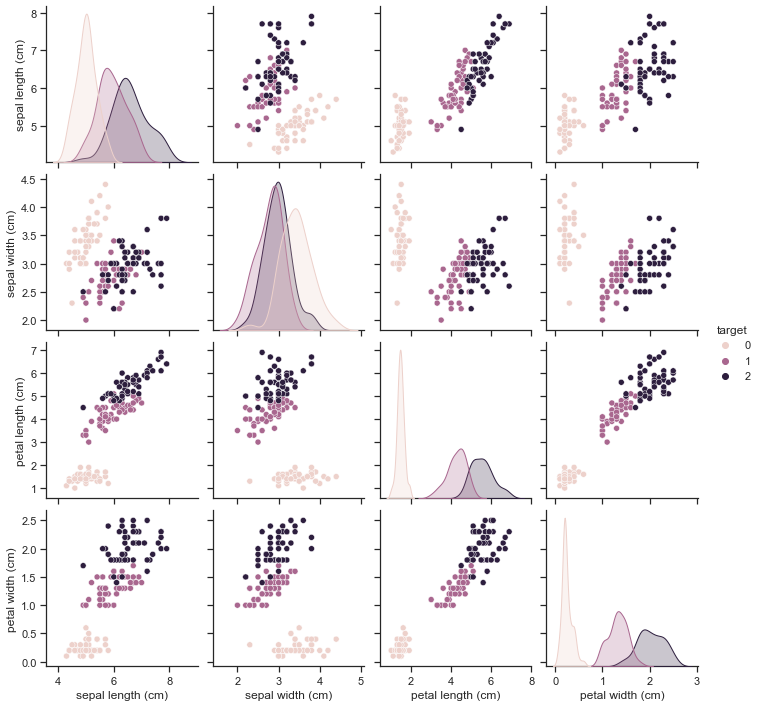

In [ ]:
sns.set(style='ticks')
sns.pairplot(iris_df, hue='target')
plt.show()

### Agrupar os dados utilizando o `K-Means`

Com 3 clusters.

In [ ]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

### Comparar os centros das classes reais com os grupos identificados pelo k-means

**Atenção:** a ordem dos grupos do k-means não é necessariamente a mesma do target (0, 1 e 2). Temos que olhar para um grupo, independente da ordem do label que o k-means atribuiu.

In [ ]:
print(k_means.cluster_centers_)

iris_df.groupby('target')[X_columns]

[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


### Visualizar os grupos em termos de dois atributos
**Atenção**: as cores dos dois gráficos podem ser diferentes, pois o rótulo do agrupamento do k-means pode não ser igual ao do target real. Nesses gráficos, o objetivo é visualizar os grupos, sem se atentar para a cor.

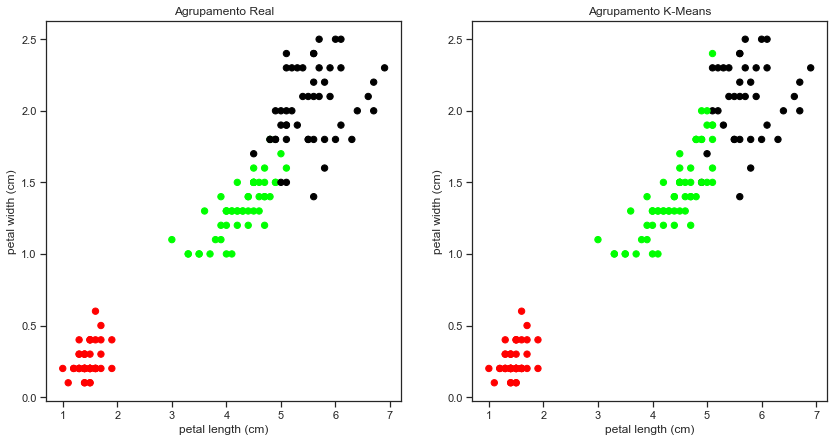

In [ ]:
# Ajusta o tamanho do gráfico a ser plotado
plt.figure(figsize=(14, 7))

cmap_real = np.array(['red', 'lime', 'black'])
cmap_group = np.array(['purple', 'orange', 'green'])

# Agrupamentos originais/reais
plt.subplot(1, 2, 1)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=cmap_real[iris_df[u'target']], s=40)
plt.title('Agrupamento Real')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Agrupamentos originais/reais
plt.subplot(1, 2, 2)
plt.scatter(x=iris_df[u'petal length (cm)'], y=iris_df[u'petal width (cm)'], c=cmap_real[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

----
# Atividades

Utilizar o conjunto de dados weatherHistory.csv, que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Utilize técnicas de aprendizado de máquina não-supervisionado para agrupar os dados visando separar os mesmos de acordo com o tipo de precipitação ("Precip Type"), usando outras variáveis. Atenção: lembre de remover a variável "Precip Type" dos atributos a serem utilizados para agrupar. Ela deve ser utilizada apenas para a comparação.

## 1. Leia o arquivo `weatherHistory.csv`
Armazene-os nas variável `df`.

Chame a função `q1.check()` no fim da célula para verificar a resposta.
Você pode pedir dicas com `q1.hint()`

In [3]:
# q1.hint()

df = pd.read_csv("weatherHistory.csv")

q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">CORRETO:</span> 



## 2. Utilize o K-means para separar os dados em grupos distintos, desconsiderando o tipo de precipitação.

Plote quaisquer gráficos que você julgue utéis para visualizar os grupos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q2.hint()`

### Plotando gráfico para visualizarmos grupos.

In [4]:
X_columns = ["Humidity", "Temperature (C)", "Apparent Temperature (C)", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)", "Precip Type"]
X = df[X_columns]

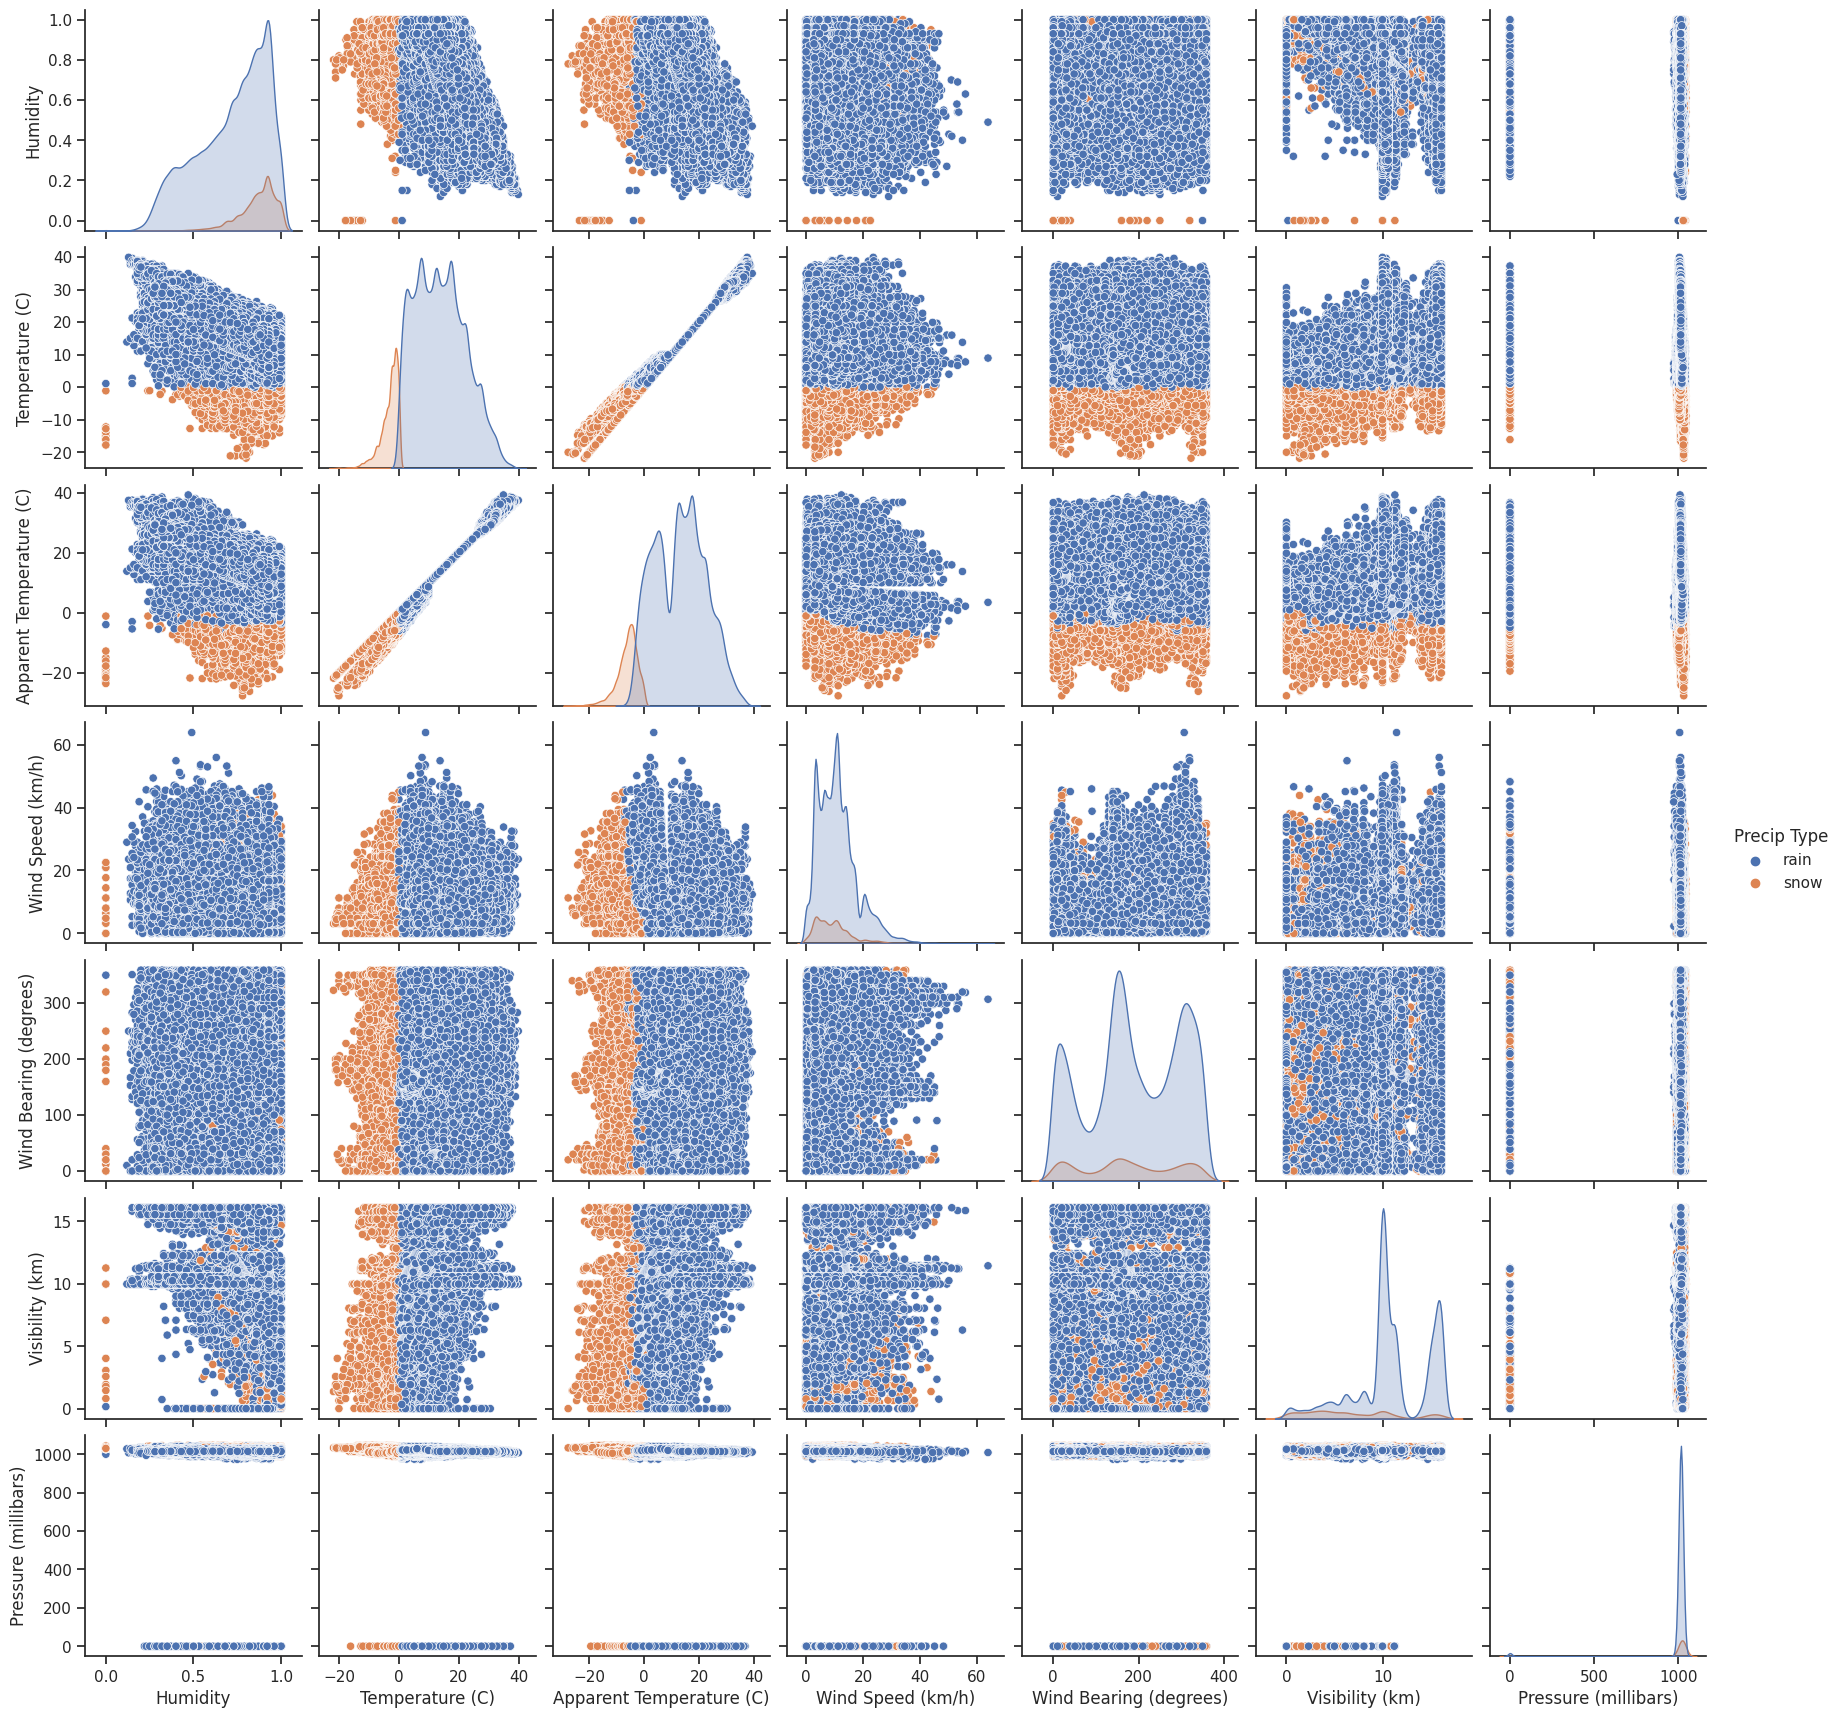

In [5]:
sns.set(style='ticks')
sns.pairplot(X, hue="Precip Type")
plt.show()

### Remoção de Precip Type nan

A coluna "Precip Type" possui três valores possíveis: rain, snow e nan. Conforme observado na atividade prática anterior (9), os registros com o valor "nan" em "Precip Type" apresentam uma maior aleatoriedade, o que dificulta a clusterização quando os utilizamos. Portanto, optaremos por separar apenas os dois tipos de precipitação existentes: snow e rain.

In [6]:
weather_df = X.dropna()

In [7]:
# Resposta da 2
x = weather_df.loc[:, weather_df.columns != 'Precip Type']
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(x)
# q2.hint()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

## 3. Veja se é possível associar cada grupo gerado pelo K-means a um tipo de precipitação diferente, olhando para o tipo de precipitação real.
Plote quaisquer gráficos que você julgue utéis para visualizar os grupos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

In [8]:
pd.options.mode.chained_assignment = None
precip_type_mapping = {"rain": 0, "snow": 1}
weather_df.loc[:, "Precip Type Numerical"] = weather_df["Precip Type"].map(precip_type_mapping)

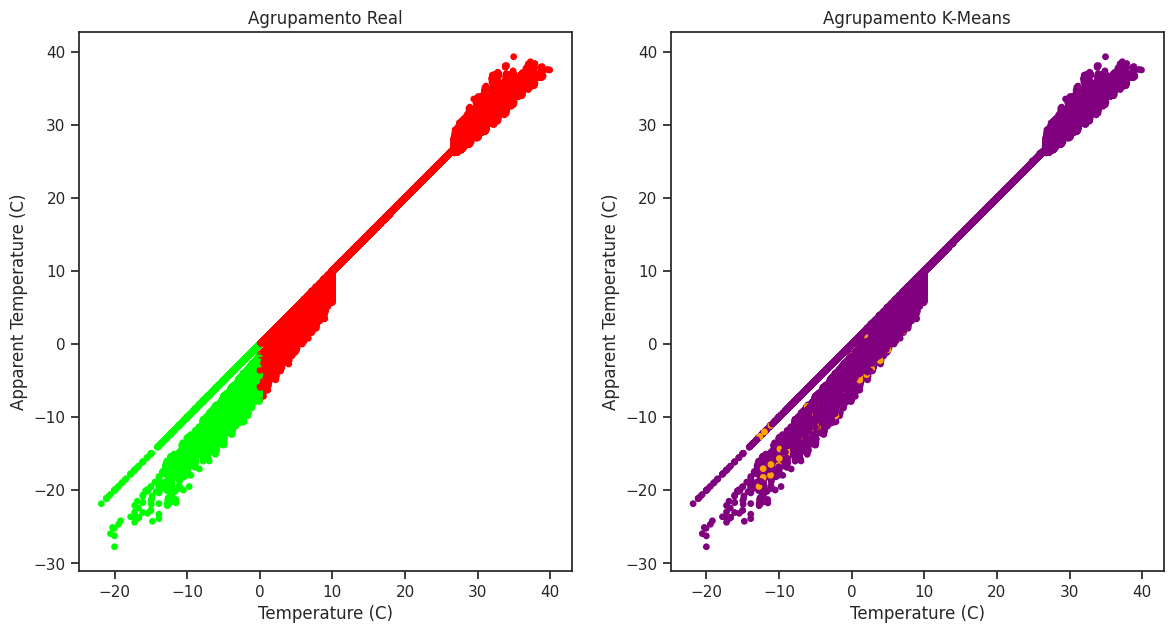

In [9]:
# Resposta da 3

def plotComparasion(x, y, df, k_means, alg="K-Means"):

    plt.figure(figsize=(14, 7))

    cmap_real = np.array(['red', 'lime'])
    cmap_group = np.array(['purple', 'orange'])

    # Agrupamentos originais/reais
    plt.subplot(1, 2, 1)
    plt.scatter(x=df[x], y=df[y], c=cmap_real[df["Precip Type Numerical"]], s=15)
    plt.title('Agrupamento Real')
    plt.xlabel(x)
    plt.ylabel(y)

    # Agrupamentos originais/reais
    plt.subplot(1, 2, 2)
    plt.scatter(x=df[x], y=df[y], c=cmap_group[k_means.labels_], s=15)
    plt.title("Agrupamento {}".format(alg))
    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()

plotComparasion("Temperature (C)", "Apparent Temperature (C)", weather_df, k_means)
# q3.hint()

## Resposta 3:

Utilizando todos os atributos númericos para a predição de precipitação não gerou bons resultados.
Iremos então utilizar a correlação de Pearson e avaliar quais podem ser os atributos que melhor clusterizam os registros de precipitação.

## 4. Faça testes com diferentes atributos para verificar se existem sub-conjuntos de atributos mais adequados para agrupar os dados

Explore **pelo menos** quatro cenários distintos. Utilize o [cálculo da silhueta](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) para verificar a qualidade dos grupos obtidos.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

<ipython-input-10-147f56e772fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = weather_df.corr()


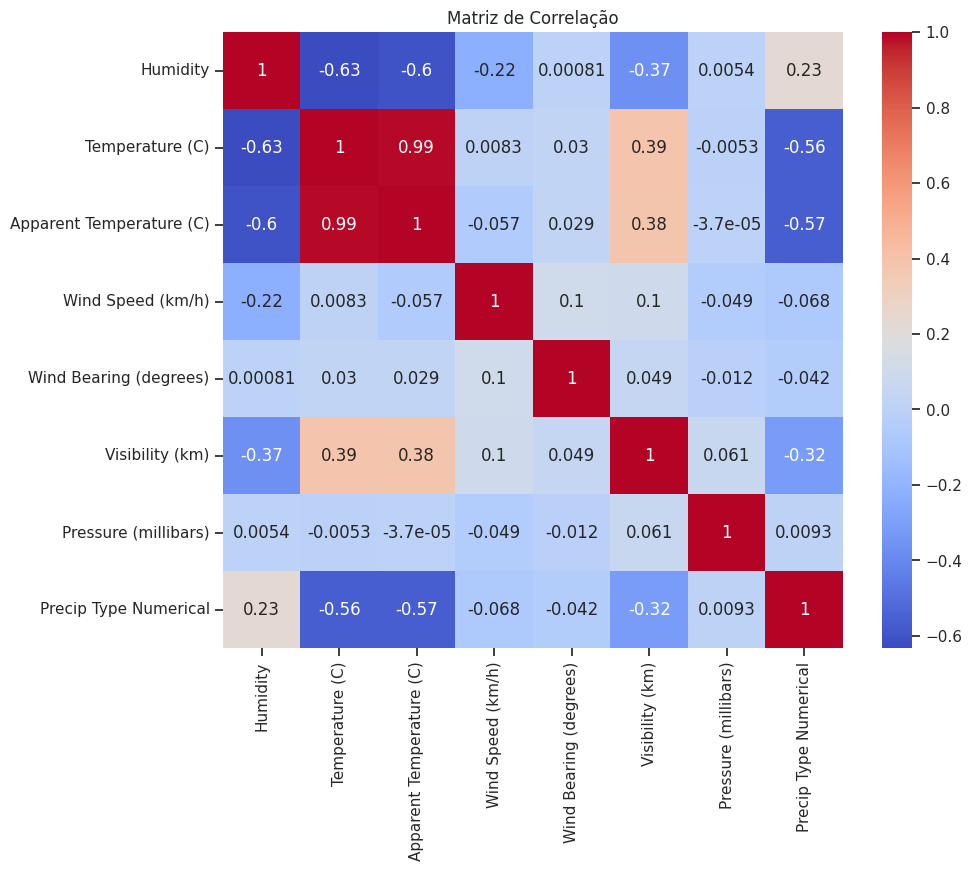

In [10]:
# q4.hint()
correlation_matrix = weather_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### Resposta da 4: - Cenário 1

**Cenário:** Usando os atributos Temperatura, Temperatura Ambiente e Humidade

**Justificativa:** Estes são os atributos que obtiveram correlação acima de 0.5

In [11]:
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


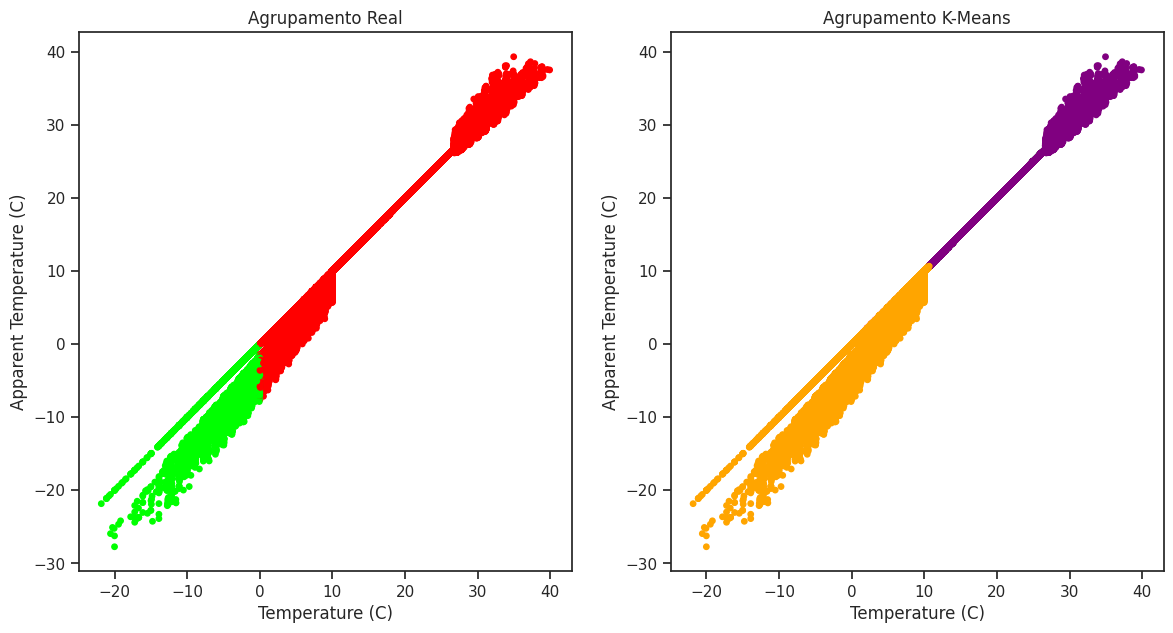

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coeficiente de silhueta médio: 0.599933303859382


In [12]:
# Resposta da 4: - Cenário 1
x = weather_df.drop(['Precip Type', 'Precip Type Numerical'], axis=1)
x = x[["Humidity", "Temperature (C)", "Apparent Temperature (C)"]]

k_means_1 = cluster.KMeans(n_clusters=2)
k_means_1.fit(x)

plotComparasion("Temperature (C)", "Apparent Temperature (C)", weather_df, k_means_1)

labels = k_means_1.fit_predict(x)
silhouette_avg = silhouette_score(x, labels)
print("Coeficiente de silhueta médio:", silhouette_avg)

### Resposta da 4: - Cenário 2

**Cenário:** Utilizando os atributos Temperatura e Temperatura Aparente.

**Justificativa:** São os que possuem maior correlação com a precipitação.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


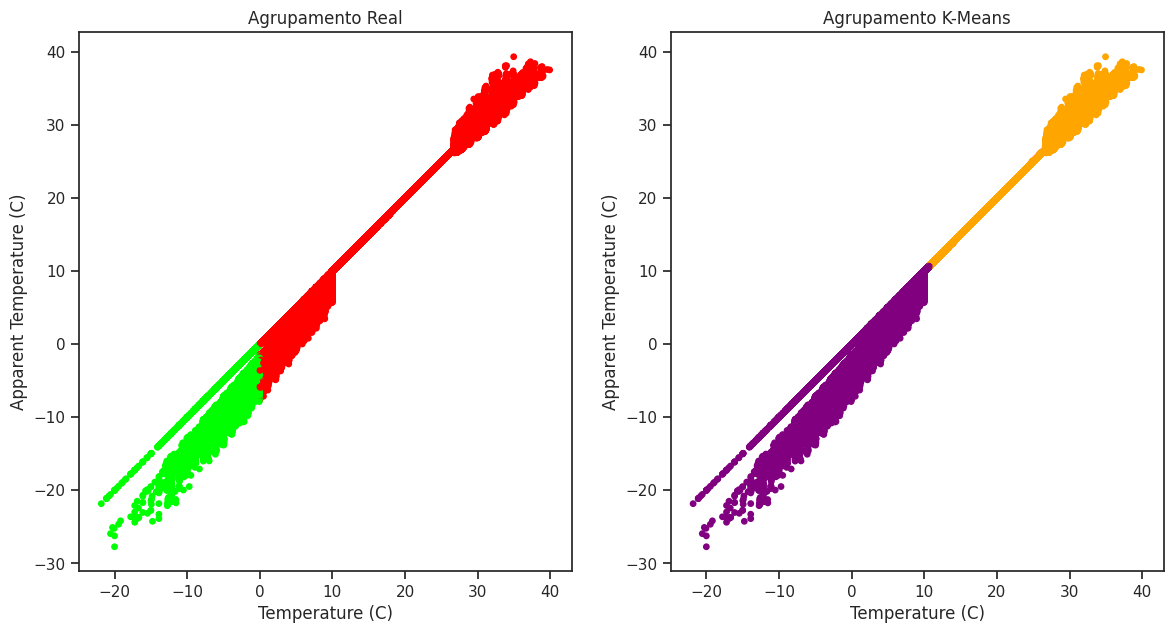

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coeficiente de silhueta médio: 0.600234275062301


In [13]:
# Resposta da 4: - Cenário 2
x = weather_df.drop(['Precip Type', 'Precip Type Numerical'], axis=1)
x = x[["Temperature (C)", "Apparent Temperature (C)"]]

k_means_2 = cluster.KMeans(n_clusters=2)
k_means_2.fit(x)

plotComparasion("Temperature (C)", "Apparent Temperature (C)", weather_df, k_means_2)

labels = k_means_2.fit_predict(x)
silhouette_avg = silhouette_score(x, labels)
print("Coeficiente de silhueta médio:", silhouette_avg)

### Resposta da 4: - Cenário 3

**Cenário:** Usando os atributos de Visilibidade e Humidade

**Justificativa:** Têm uma correlação significante para a precipitação, e não sofrerão interferência com valores que enviesam muito os clusters como Temperatura.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


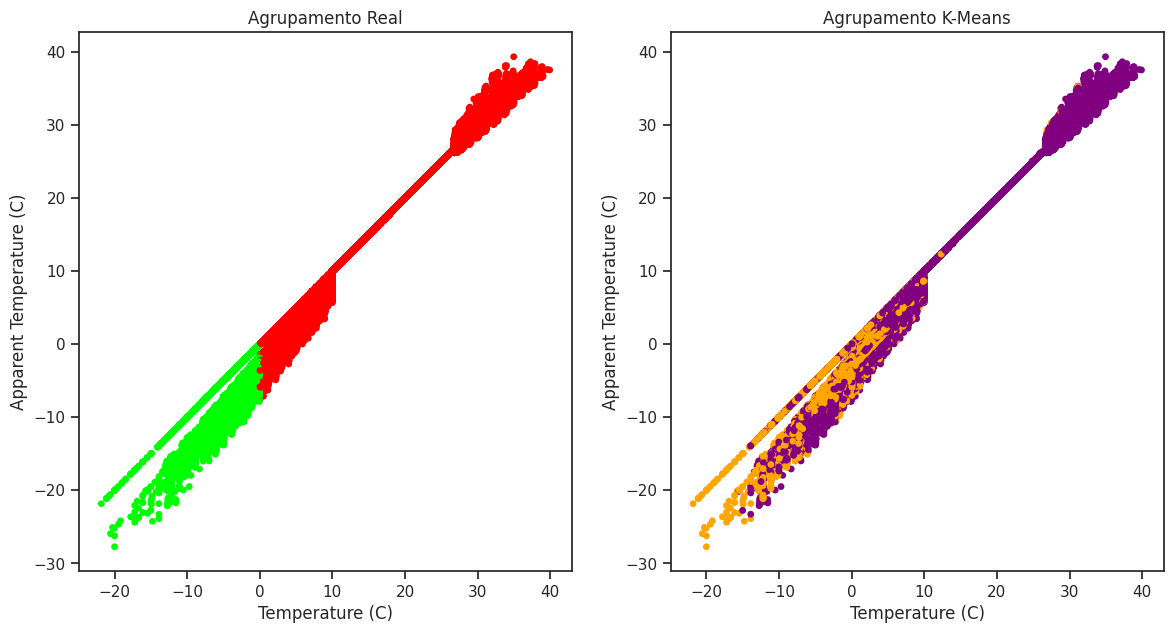

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coeficiente de silhueta médio: 0.6030993727412824


In [14]:
# Resposta da 4: - Cenário 3
x = weather_df.drop(['Precip Type', 'Precip Type Numerical'], axis=1)
x = x[["Visibility (km)", "Humidity"]]

k_means_3 = cluster.KMeans(n_clusters=2)
k_means_3.fit(x)

plotComparasion("Temperature (C)", "Apparent Temperature (C)", weather_df, k_means_3)

labels = k_means_3.fit_predict(x)
silhouette_avg = silhouette_score(x, labels)
print("Coeficiente de silhueta médio:", silhouette_avg)

### Resposta da 4: - Cenário 4

**Cenário:** Utilizando os atributos Temperatura, Temperatura Aparente, Humidade e Visibilidade

**Justificativa:** Têm correlação acima de 0.3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


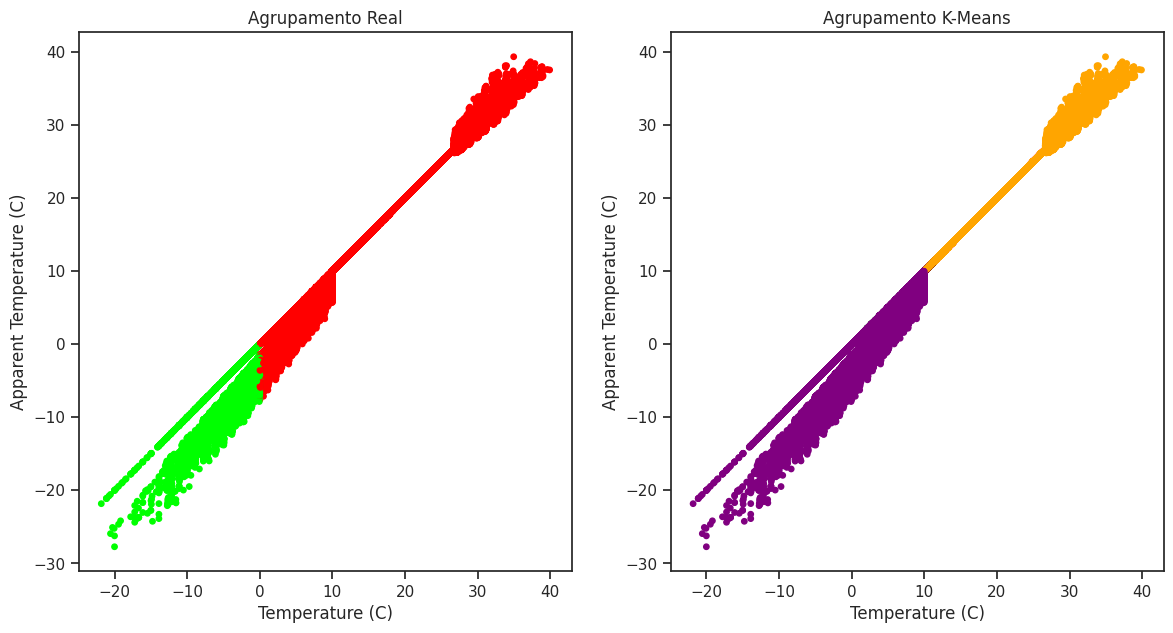

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coeficiente de silhueta médio: 0.5439214651769199


Ellipsis

In [15]:
# Resposta da 4: - Cenário 4
x = weather_df.drop(['Precip Type', 'Precip Type Numerical'], axis=1)
x = x[["Visibility (km)", "Humidity", "Temperature (C)", "Apparent Temperature (C)"]]

k_means_4 = cluster.KMeans(n_clusters=2)
k_means_4.fit(x)

plotComparasion("Temperature (C)", "Apparent Temperature (C)", weather_df, k_means_4)

labels = k_means_4.fit_predict(x)
silhouette_avg = silhouette_score(x, labels)
print("Coeficiente de silhueta médio:", silhouette_avg)

...

## 5. A partir dos resultados da Questão 4, é possível observar que o coeficiente de silhueta está associado a um melhor agrupamento, ao se comparar com os dados reais?
Justifique sua resposta.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

### Resposta da 5

**Não**, o coeficiente de silhueta é uma métrica que mede o quão bem cada amostra se encaixo no seu próprio cluster em relação aos outros clusters.

Este coeficiente não mostra o quão bem foi a clusterização em relação aos dados reais, os "clusters" reais.

Isso foi observado com os gráficos e silhuetas acima.
Quando tinhamos um gráfico mais próximo do real, obtinhamos uma sulheta próxima de 0.6, mas ao utilizarmos mais atributos, a clusterização não era tão proxima da real, embora a silhueta fosse próxima de 0.85.


## 6. Quais métricas você pode usar para validar a acurácia do K-Means?
Justifique sua resposta.

Essa questão não possui verificação automática mas você pode pedir dicas com `q6.hint()`

### Resposta da 6.
- Índice de Silhueta (Silhouette Score):
- SSE
- Validação Externa: Jaccard, Rand ajustado
- Visualização: Gráficos

In [16]:
from sklearn.metrics import adjusted_rand_score, jaccard_score

x = weather_df.drop(['Precip Type'], axis=1)

k_means = cluster.KMeans(n_clusters=2)
k_means.fit(x)

precip_type_mapping = {"rain": 0, "snow": 1}
y_real = weather_df['Precip Type'].map(precip_type_mapping)
y_pred = k_means.labels_

rand_index = adjusted_rand_score(y_real, y_pred)

jaccard_index = jaccard_score(y_real, y_pred, average='macro')

labels = k_means.fit_predict(x)
silhouette_avg = silhouette_score(x, labels)

print("Coeficiente de silhueta médio:", silhouette_avg)
print("Índice Rand ajustado:", rand_index)
print("Índice Jaccard:", jaccard_index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Coeficiente de silhueta médio: 0.8752852330234002
Índice Rand ajustado: 0.00532444748019254
Índice Jaccard: 0.44683473201663365


### Interpretação dos Resultados

Ambos os algoritmos revelam que há uma baixa concordância na clusterização do K-means em relação aos dados reais.

No entanto, mesmo que a métrica de silhueta (0.87) tenha apresentado um valor mais alto do que em outros cenários, o resultado mostrou uma clusterização inadequada em relação aos dados reais.

Portando, utilizando além de visualização gráfico, podemos concluir que apenas a métrica de silhueta não é suficiente para determinar se o K-means realizou ou não uma boa clusterização em relação aos dados reais.

## 7. Pesquise outro algoritmo de aprendizado não-supervisionado para *clustering*, aplique para a mesma base, e compare com o K-Means
Coloque todo o código do outro algoritmo e explique completamente a sua comparação.

Essa questão não possui verificação automática mas você pode pedir dicas com `q7.hint()`

## Algoritmo Birch

### Resposta da 7.

#### Código e conclusão abaixo

In [17]:
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler

x = weather_df.drop(['Precip Type'], axis=1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

birch = Birch(n_clusters=2, threshold=0.5)
birch.fit(x_scaled)

precip_type_mapping = {"rain": 0, "snow": 1}
y_real = weather_df['Precip Type'].map(precip_type_mapping)
y_pred = birch.labels_

rand_index = adjusted_rand_score(y_real, y_pred)
jaccard_index = jaccard_score(y_real, y_pred, average='macro')

print("Índice Rand ajustado:", rand_index)
print("Índice Jaccard:", jaccard_index)


Índice Rand ajustado: 0.00532444748019254
Índice Jaccard: 0.44683473201663365


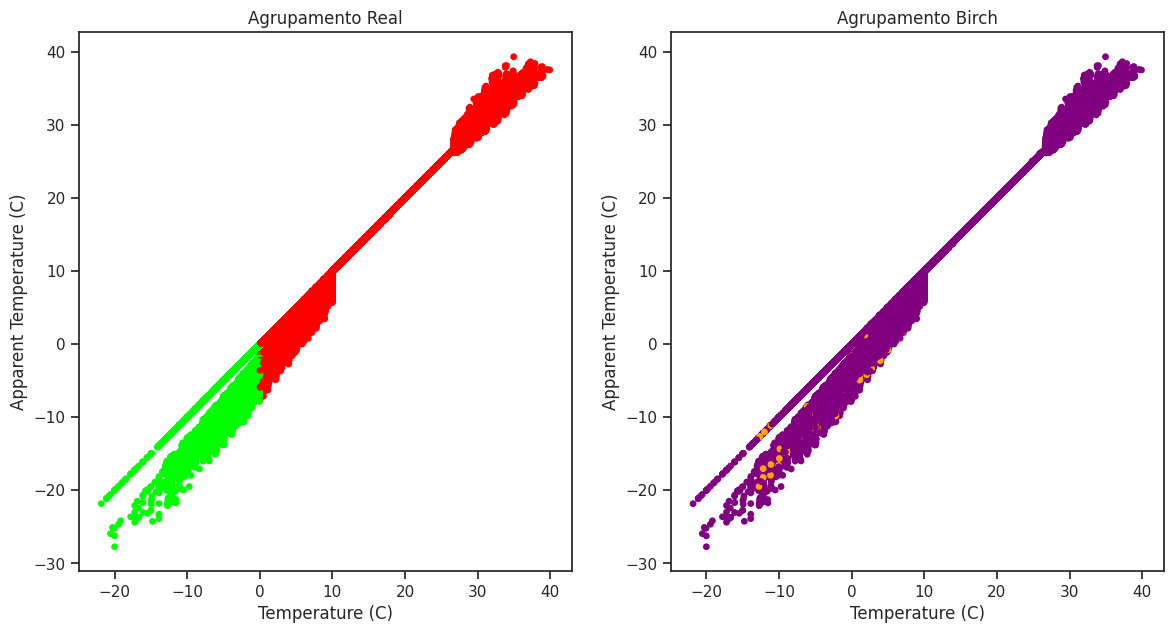

In [18]:
plotComparasion("Temperature (C)", "Apparent Temperature (C)", weather_df, birch, "Birch")

### Comparação

Realizando uma comparação com os resultados obtidos na Questão 6, observamos que o algoritmo de Birch apresentou resultados **semelhantes** em termos de clusterização.

Ambos os algoritmos, Birch e K-means, mostraram-se **ineficientes** na clusterização adequada dos dados reais.

Uma alternativa interessante a ser considerada é o algoritmo **AgglomerativeClustering**, que utiliza uma abordagem hierárquica na clusterização. No entanto, devido a **limitações** do ambiente Google Colab, não é possível utilizá-lo, pois ele requer um consumo de memória RAM que excede o limite imposto pelo Colab.

Embora os algoritmos utilizem métodos diferentes para realizar a clusterização, não houve diferenças significativas nos resultados obtidos.

O K-means é um algoritmo que busca minimizar a soma dos quadrados das distâncias entre os pontos e os centróides atribuídos. Por outro lado, o Birch é um método hierárquico de clusterização que utiliza uma estrutura de árvore para construir uma representação compacta dos dados.